# Tech Challenge Fase 3 - Machine Learning Engineering
## Previsão de Atrasos de Voos nos EUA

---

### Objetivo
Desenvolver um pipeline completo de ciência de dados para análise e previsão de atrasos de voos, utilizando técnicas de Machine Learning supervisionado e não supervisionado.

### Dataset
Flight Delays and Cancellations (2015) - Dados do Departamento de Transporte dos EUA

### Estrutura do Projeto
1. **Carregamento e Exploração dos Dados**
2. **Análise Exploratória (EDA)**
3. **Tratamento de Dados e Feature Engineering**
4. **Modelagem Supervisionada** - Classificação de Atrasos
5. **Modelagem Não Supervisionada** - Clusterização de Aeroportos
6. **Conclusões e Próximos Passos**

---
## 1. Configuração e Importação de Bibliotecas

Primeiro, importamos todas as bibliotecas necessárias para o projeto.

In [71]:
# Bibliotecas básicas
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print('Bibliotecas importadas com sucesso!')

Bibliotecas importadas com sucesso!


---
## 2. Carregamento dos Dados

Vamos carregar os três datasets disponíveis:
- **flights.csv**: dados dos voos (dataset principal)
- **airports.csv**: informações dos aeroportos
- **airlines.csv**: nomes das companhias aéreas

In [125]:
# Caminho dos dados
DATA_PATH = 'data/'

# Carregar datasets auxiliares (pequenos)
airlines = pd.read_csv(f'{DATA_PATH}airlines.csv')
airports = pd.read_csv(f'{DATA_PATH}airports.csv')

print('=== AIRLINES (Companhias Aéreas) ===')
print(f'Dimensões: {airlines.shape}')
display(airlines)

print('\n=== AIRPORTS (Aeroportos) ===')
print(f'Dimensões: {airports.shape}')
display(airports.head(10))

=== AIRLINES (Companhias Aéreas) ===
Dimensões: (14, 2)


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.



=== AIRPORTS (Aeroportos) ===
Dimensões: (322, 7)


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [73]:
# Carregar dataset principal de voos
# O dataset é grande (~5.8 milhões de linhas), então pode demorar alguns segundos
print('Carregando flights.csv... (pode demorar ~30 segundos)')

flights = pd.read_csv(f'{DATA_PATH}flights.csv', low_memory=False)

print(f'\nDataset carregado com sucesso!')
print(f'Dimensões: {flights.shape[0]:,} linhas x {flights.shape[1]} colunas')

Carregando flights.csv... (pode demorar ~30 segundos)

Dataset carregado com sucesso!
Dimensões: 5,819,079 linhas x 31 colunas


In [117]:
# Visualizar primeiras linhas
print('=== PRIMEIRAS LINHAS DO DATASET ===')
flights.tail(10)

=== PRIMEIRAS LINHAS DO DATASET ===


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819069,2015,12,31,4,B6,1248,N948JB,LAS,JFK,2359,...,1020.0,159.0,0,0,NaN,0.0,0.0,159.0,0.0,0.0
5819070,2015,12,31,4,B6,80,N584JB,RNO,JFK,2359,...,744.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819071,2015,12,31,4,B6,802,N589JB,SLC,MCO,2359,...,625.0,17.0,0,0,NaN,1.0,0.0,16.0,0.0,0.0
5819072,2015,12,31,4,B6,98,N607JB,DEN,JFK,2359,...,519.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819073,2015,12,31,4,B6,66,N655JB,ABQ,JFK,2359,...,549.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Informações sobre tipos de dados e memória
print('=== INFORMAÇÕES DO DATASET ===')
flights.info()

=== INFORMAÇÕES DO DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  D

---
## 3. Análise Exploratória de Dados (EDA)

A EDA é uma etapa fundamental para entender os dados antes de aplicar modelos de Machine Learning.

### 3.1 Estatísticas Descritivas

In [76]:
# Estatísticas descritivas das variáveis numéricas
print('=== ESTATÍSTICAS DESCRITIVAS ===')
flights.describe().round(2)

=== ESTATÍSTICAS DESCRITIVAS ===


,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5819079.00,5819079.00,5819079.00,5819079.00,5819079.00,5732926.00,5732926.00,5730032.00,5730032.00,...,5819079.00,5726566.00,5714008.00,5819079.00,5819079.00,1063439.00,1063439.00,1063439.00,1063439.00,1063439.00
mean,2015.0,6.52,15.70,3.93,2173.09,1329.60,1335.20,9.37,16.07,1357.17,...,1493.81,1476.49,4.41,0.00,0.02,13.48,0.08,18.97,23.47,2.92
std,0.0,3.41,8.78,1.99,1757.06,483.75,496.42,37.08,8.90,498.01,...,507.16,526.32,39.27,0.05,0.12,28.00,2.14,48.16,43.20,20.43
min,2015.0,1.00,1.00,1.00,1.00,1.00,1.00,-82.00,1.00,1.00,...,1.00,1.00,-87.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2015.0,4.00,8.00,2.00,730.00,917.00,921.00,-5.00,11.00,935.00,...,1110.00,1059.00,-13.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2015.0,7.00,16.00,4.00,1690.00,1325.00,1330.00,-2.00,14.00,1343.00,...,1520.00,1512.00,-5.00,0.00,0.00,2.00,0.00,2.00,3.00,0.00
75%,2015.0,9.00,23.00,6.00,3230.00,1730.00,1740.00,7.00,19.00,1754.00,...,1918.00,1917.00,8.00,0.00,0.00,18.00,0.00,19.00,29.00,0.00
max,2015.0,12.00,31.00,7.00,9855.00,2359.00,2400.00,1988.00,225.00,2400.00,...,2400.00,2400.00,1971.00,1.00,1.00,1134.00,573.00,1971.00,1331.00,1211.00


In [77]:
# Estatísticas específicas dos atrasos
print('=== ESTATÍSTICAS DE ATRASOS (em minutos) ===')
print('\n--- Atraso na Partida (DEPARTURE_DELAY) ---')
print(f"Média: {flights['DEPARTURE_DELAY'].mean():.2f} min")
print(f"Mediana: {flights['DEPARTURE_DELAY'].median():.2f} min")
print(f"Desvio Padrão: {flights['DEPARTURE_DELAY'].std():.2f} min")
print(f"Mínimo: {flights['DEPARTURE_DELAY'].min():.2f} min")
print(f"Máximo: {flights['DEPARTURE_DELAY'].max():.2f} min")

print('\n--- Atraso na Chegada (ARRIVAL_DELAY) ---')
print(f"Média: {flights['ARRIVAL_DELAY'].mean():.2f} min")
print(f"Mediana: {flights['ARRIVAL_DELAY'].median():.2f} min")
print(f"Desvio Padrão: {flights['ARRIVAL_DELAY'].std():.2f} min")

=== ESTATÍSTICAS DE ATRASOS (em minutos) ===

--- Atraso na Partida (DEPARTURE_DELAY) ---
Média: 9.37 min
Mediana: -2.00 min
Desvio Padrão: 37.08 min
Mínimo: -82.00 min
Máximo: 1988.00 min

--- Atraso na Chegada (ARRIVAL_DELAY) ---
Média: 4.41 min
Mediana: -5.00 min
Desvio Padrão: 39.27 min


### 3.2 Análise de Valores Ausentes

Identificar e entender os valores ausentes é crucial para o tratamento adequado dos dados.

In [78]:
# Análise de valores ausentes
missing = pd.DataFrame({
    'Valores Ausentes': flights.isnull().sum(),
    'Percentual (%)': (flights.isnull().sum() / len(flights) * 100).round(2)
}).sort_values('Percentual (%)', ascending=False)

# Mostrar apenas colunas com valores ausentes
missing_filtered = missing[missing['Valores Ausentes'] > 0]
print(f'=== VALORES AUSENTES ({len(missing_filtered)} colunas com dados faltantes) ===')
display(missing_filtered)

=== VALORES AUSENTES (18 colunas com dados faltantes) ===


,Valores Ausentes,Percentual (%)
CANCELLATION_REASON,5729195,98.46
WEATHER_DELAY,4755640,81.72
LATE_AIRCRAFT_DELAY,4755640,81.72
AIRLINE_DELAY,4755640,81.72
SECURITY_DELAY,4755640,81.72
AIR_SYSTEM_DELAY,4755640,81.72
AIR_TIME,105071,1.81
ARRIVAL_DELAY,105071,1.81
ELAPSED_TIME,105071,1.81
WHEELS_ON,92513,1.59


**Observações sobre valores ausentes:**
- As colunas de motivos de atraso (AIR_SYSTEM_DELAY, SECURITY_DELAY, etc.) têm ~80% de valores ausentes - isso é esperado pois só são preenchidas quando há atraso
- CANCELLATION_REASON tem ~98% ausente - só é preenchido quando o voo é cancelado
- Voos cancelados não têm informações de chegada/partida real

### 3.3 Distribuição dos Voos

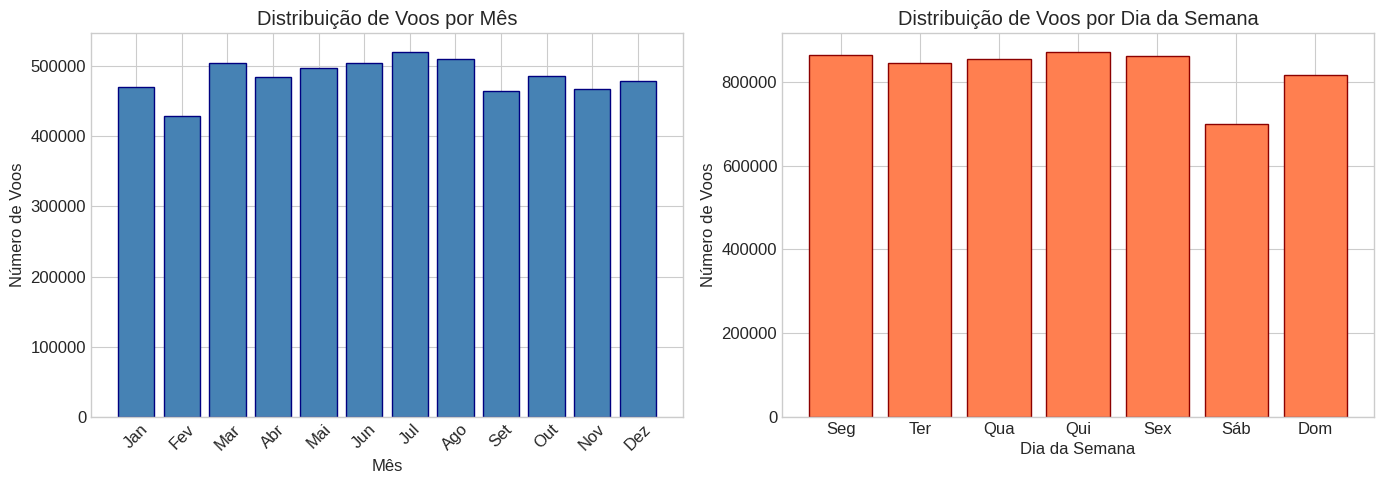

Total de voos no dataset: 5,819,079


In [79]:
# Distribuição por mês
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Voos por mês
month_names = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
               'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
monthly_flights = flights['MONTH'].value_counts().sort_index()

axes[0].bar(month_names, monthly_flights.values, color='steelblue', edgecolor='navy')
axes[0].set_xlabel('Mês')
axes[0].set_ylabel('Número de Voos')
axes[0].set_title('Distribuição de Voos por Mês')
axes[0].tick_params(axis='x', rotation=45)

# Voos por dia da semana
day_names = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
daily_flights = flights['DAY_OF_WEEK'].value_counts().sort_index()

axes[1].bar(day_names, daily_flights.values, color='coral', edgecolor='darkred')
axes[1].set_xlabel('Dia da Semana')
axes[1].set_ylabel('Número de Voos')
axes[1].set_title('Distribuição de Voos por Dia da Semana')

plt.tight_layout()
plt.show()

print(f"Total de voos no dataset: {len(flights):,}")

In [80]:
# Top 10 Companhias Aéreas e Aeroportos
airline_counts = flights['AIRLINE'].value_counts().head(10)
airline_counts.index = airline_counts.index.map(
    dict(zip(airlines['IATA_CODE'], airlines['AIRLINE']))
)

airport_counts = flights['ORIGIN_AIRPORT'].value_counts().head(10)

print('=== TOP 10 COMPANHIAS AÉREAS ===')
display(airline_counts.to_frame('Total de Voos'))

print('\n=== TOP 10 AEROPORTOS DE ORIGEM ===')
display(airport_counts.to_frame('Total de Voos'))

=== TOP 10 COMPANHIAS AÉREAS ===


,Total de Voos
AIRLINE,
Southwest Airlines Co.,1261855
Delta Air Lines Inc.,875881
American Airlines Inc.,725984
Skywest Airlines Inc.,588353
Atlantic Southeast Airlines,571977
United Air Lines Inc.,515723
American Eagle Airlines Inc.,294632
JetBlue Airways,267048
US Airways Inc.,198715



=== TOP 10 AEROPORTOS DE ORIGEM ===


,Total de Voos
ORIGIN_AIRPORT,
ATL,346836
ORD,285884
DFW,239551
DEN,196055
LAX,194673
SFO,148008
PHX,146815
IAH,146622
LAS,133181


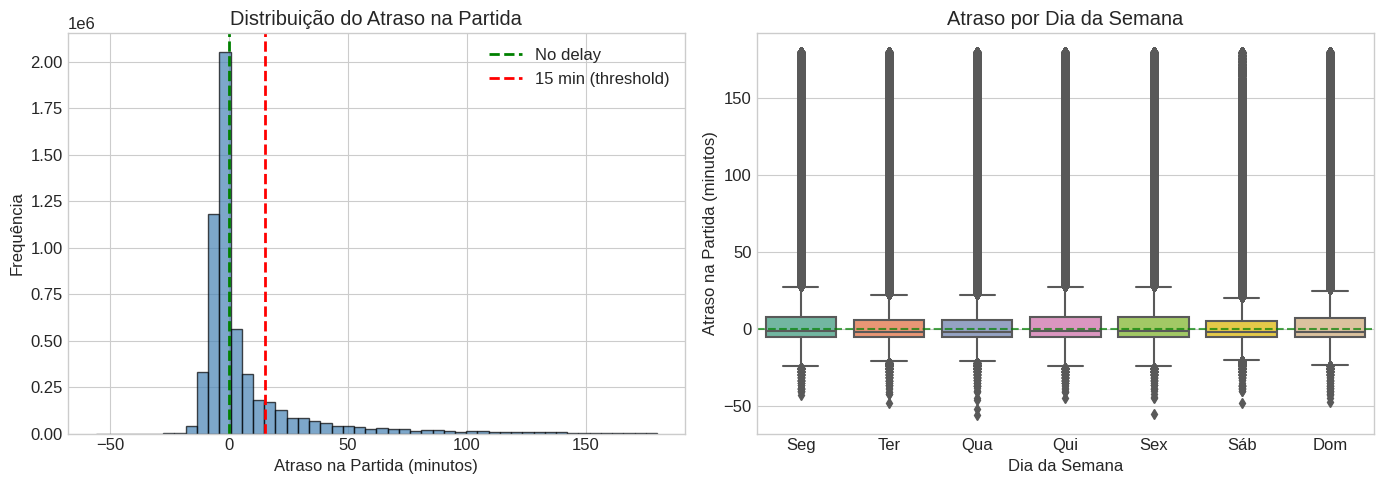

In [81]:
# Distribuição dos atrasos na partida
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Filtrar atrasos razoáveis para visualização (entre -60 e 180 min)
delay_filtered = flights['DEPARTURE_DELAY'][
    (flights['DEPARTURE_DELAY'] >= -60) & 
    (flights['DEPARTURE_DELAY'] <= 180)
].dropna()

# Histograma
axes[0].hist(delay_filtered, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='green', linestyle='--', linewidth=2, label='No delay')
axes[0].axvline(x=15, color='red', linestyle='--', linewidth=2, label='15 min (threshold)')
axes[0].set_xlabel('Atraso na Partida (minutos)')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição do Atraso na Partida')
axes[0].legend()

# Boxplot por dia da semana
delay_by_day = flights[flights['DEPARTURE_DELAY'].between(-60, 180)].copy()
delay_by_day['DAY_NAME'] = delay_by_day['DAY_OF_WEEK'].map(
    {1: 'Seg', 2: 'Ter', 3: 'Qua', 4: 'Qui', 5: 'Sex', 6: 'Sáb', 7: 'Dom'}
)

day_order = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
sns.boxplot(data=delay_by_day, x='DAY_NAME', y='DEPARTURE_DELAY', 
            order=day_order, ax=axes[1], palette='Set2')
axes[1].axhline(y=0, color='green', linestyle='--', alpha=0.7)
axes[1].set_xlabel('Dia da Semana')
axes[1].set_ylabel('Atraso na Partida (minutos)')
axes[1].set_title('Atraso por Dia da Semana')

plt.tight_layout()
plt.show()

In [82]:
# Taxa de atrasos (>15 min) por companhia aérea
flights_valid = flights[flights['DEPARTURE_DELAY'].notna()].copy()
flights_valid['IS_DELAYED'] = (flights_valid['DEPARTURE_DELAY'] > 15).astype(int) 

# Agrupar por companhia
delay_rate_airline = flights_valid.groupby('AIRLINE').agg({
    'IS_DELAYED': 'mean',
    'DEPARTURE_DELAY': 'mean',
    'FLIGHT_NUMBER': 'count'
}).round(3)

delay_rate_airline.columns = ['Taxa de Atraso', 'Atraso Médio (min)', 'Total Voos']
delay_rate_airline = delay_rate_airline.sort_values('Taxa de Atraso', ascending=False)

# Adicionar nome da companhia
delay_rate_airline['Companhia'] = delay_rate_airline.index.map(
    dict(zip(airlines['IATA_CODE'], airlines['AIRLINE']))
)

print('=== TAXA DE ATRASO POR COMPANHIA AÉREA ===')
print('(Atraso = partida com mais de 15 minutos de atraso)')
display(delay_rate_airline[['Companhia', 'Taxa de Atraso', 'Atraso Médio (min)', 'Total Voos']])

# Insight
media_geral = delay_rate_airline['Taxa de Atraso'].mean()
pior = delay_rate_airline.iloc[0]
melhor = delay_rate_airline.iloc[-1]
print(f"\n>>> Taxa média de atraso: {media_geral*100:.1f}%")
print(f">>> Pior: {pior['Companhia']} ({pior['Taxa de Atraso']*100:.1f}%)")
print(f">>> Melhor: {melhor['Companhia']} ({melhor['Taxa de Atraso']*100:.1f}%)")

=== TAXA DE ATRASO POR COMPANHIA AÉREA ===
(Atraso = partida com mais de 15 minutos de atraso)


,Companhia,Taxa de Atraso,Atraso Médio (min),Total Voos
AIRLINE,,,,
NK,Spirit Air Lines,0.265,15.945,115454
UA,United Air Lines Inc.,0.228,14.435,509534
F9,Frontier Airlines Inc.,0.223,13.351,90290
B6,JetBlue Airways,0.212,11.514,262843
WN,Southwest Airlines Co.,0.204,10.582,1246129
MQ,American Eagle Airlines Inc.,0.195,10.125,280282
VX,Virgin America,0.173,9.023,61385
EV,Atlantic Southeast Airlines,0.169,8.716,557294
AA,American Airlines Inc.,0.167,8.901,715598



>>> Taxa média de atraso: 17.5%
>>> Pior: Spirit Air Lines (26.5%)
>>> Melhor: Hawaiian Airlines Inc. (6.9%)


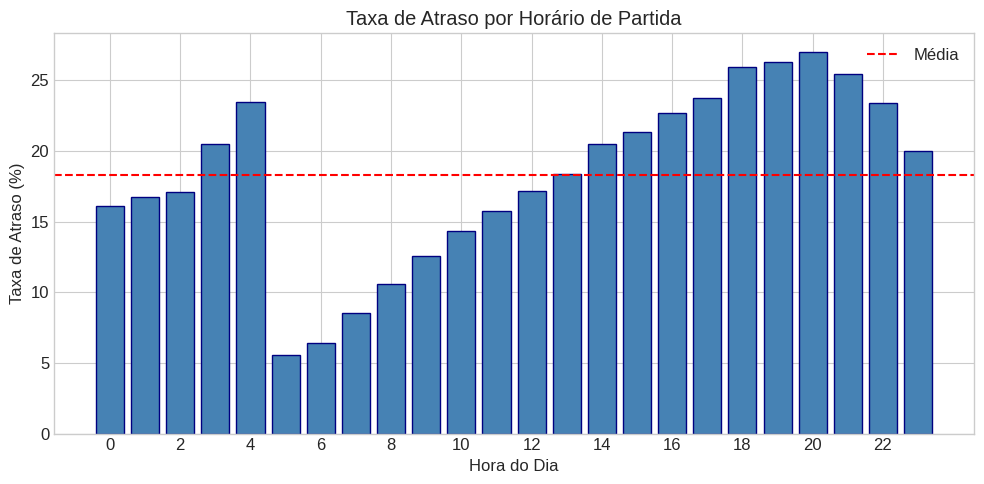

>>> INSIGHT: Voos no final da tarde/noite (17h-21h) têm maior taxa de atraso!
>>> Voos de madrugada/manhã cedo (5h-9h) têm menor taxa de atraso.


In [119]:
# Atrasos por horário do dia
flights_valid['HOUR'] = flights_valid['SCHEDULED_DEPARTURE'] // 100 

hourly_delay = flights_valid.groupby('HOUR')['IS_DELAYED'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(hourly_delay['HOUR'], hourly_delay['IS_DELAYED'] * 100, color='steelblue', edgecolor='navy')
plt.axhline(y=hourly_delay['IS_DELAYED'].mean() * 100, color='red', linestyle='--', label='Média')
plt.xlabel('Hora do Dia')
plt.ylabel('Taxa de Atraso (%)')
plt.title('Taxa de Atraso por Horário de Partida')
plt.xticks(range(0, 24, 2))
plt.legend()
plt.tight_layout()
plt.show()

print('>>> INSIGHT: Voos no final da tarde/noite (17h-21h) têm maior taxa de atraso!')
print('>>> Voos de madrugada/manhã cedo (5h-9h) têm menor taxa de atraso.')

In [84]:
# Análise de cancelamentos
cancel_rate = flights['CANCELLED'].mean() * 100
divert_rate = flights['DIVERTED'].mean() * 100

print('=== STATUS DOS VOOS ===')
print(f"Voos normais: {100 - cancel_rate - divert_rate:.2f}%")
print(f"Voos cancelados: {cancel_rate:.2f}% ({flights['CANCELLED'].sum():,} voos)")
print(f"Voos desviados: {divert_rate:.2f}% ({flights['DIVERTED'].sum():,} voos)")

# Motivos de cancelamento
cancel_reasons = flights[flights['CANCELLED'] == 1]['CANCELLATION_REASON'].value_counts()
reason_names = {'A': 'Companhia Aérea', 'B': 'Clima', 'C': 'Sistema Aéreo', 'D': 'Segurança'}
cancel_reasons.index = cancel_reasons.index.map(reason_names)

print('\n=== MOTIVOS DE CANCELAMENTO ===')
for motivo, qtd in cancel_reasons.items():
    pct = qtd / cancel_reasons.sum() * 100
    print(f"  {motivo}: {qtd:,} ({pct:.1f}%)")

=== STATUS DOS VOOS ===
Voos normais: 98.19%
Voos cancelados: 1.54% (89,884 voos)
Voos desviados: 0.26% (15,187 voos)

=== MOTIVOS DE CANCELAMENTO ===
  Clima: 48,851 (54.3%)
  Companhia Aérea: 25,262 (28.1%)
  Sistema Aéreo: 15,749 (17.5%)
  Segurança: 22 (0.0%)


In [85]:
# Correlação entre variáveis principais
corr_cols = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'DISTANCE', 'SCHEDULED_TIME']
corr_matrix = flights[corr_cols].corr().round(2)

print('=== MATRIZ DE CORRELAÇÃO ===')
display(corr_matrix)

print('\n>>> INSIGHT: Alta correlação entre DEPARTURE_DELAY e ARRIVAL_DELAY (0.94)')
print('>>> Atrasos na partida geralmente resultam em atrasos na chegada.')

=== MATRIZ DE CORRELAÇÃO ===


,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME
DEPARTURE_DELAY,1.00,0.94,0.02,0.03
ARRIVAL_DELAY,0.94,1.00,-0.03,-0.03
DISTANCE,0.02,-0.03,1.00,0.98
SCHEDULED_TIME,0.03,-0.03,0.98,1.00



>>> INSIGHT: Alta correlação entre DEPARTURE_DELAY e ARRIVAL_DELAY (0.94)
>>> Atrasos na partida geralmente resultam em atrasos na chegada.


---
## 4. Tratamento de Dados e Feature Engineering

Agora vamos preparar os dados para a modelagem:
1. Remover voos cancelados (não têm informação de atraso)
2. Tratar valores ausentes
3. Criar novas variáveis (features)

In [86]:
# Criar cópia para não modificar o original
df = flights.copy()

# Remover voos cancelados e desviados
print(f'Tamanho original: {len(df):,}')
df = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)]
print(f'Após remover cancelados/desviados: {len(df):,}')

# Remover linhas com valores ausentes nas colunas essenciais
essential_cols = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'SCHEDULED_DEPARTURE', 
                  'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'AIRLINE']
df = df.dropna(subset=essential_cols)
print(f'Após remover valores ausentes essenciais: {len(df):,}')

Tamanho original: 5,819,079
Após remover cancelados/desviados: 5,714,008
Após remover valores ausentes essenciais: 5,714,008


In [87]:
# === FEATURE ENGINEERING ===

# 1. Variável alvo: IS_DELAYED (atraso > 15 minutos)
df['IS_DELAYED'] = (df['DEPARTURE_DELAY'] > 15).astype(int)

# 2. Hora do dia
df['HOUR'] = df['SCHEDULED_DEPARTURE'] // 100

# 3. Fim de semana
df['IS_WEEKEND'] = (df['DAY_OF_WEEK'] >= 6).astype(int)

print('=== FEATURES CRIADAS ===')
print(f"IS_DELAYED: {df['IS_DELAYED'].value_counts().to_dict()}")
print(f"IS_WEEKEND: {df['IS_WEEKEND'].value_counts().to_dict()}")

=== FEATURES CRIADAS ===
IS_DELAYED: {0: 4702421, 1: 1011587}
IS_WEEKEND: {0: 4221708, 1: 1492300}


In [88]:
# Distribuição da variável alvo
delay_counts = df['IS_DELAYED'].value_counts()
total = len(df)

print('=== DISTRIBUIÇÃO DA VARIÁVEL ALVO (IS_DELAYED) ===')
print(f"Sem Atraso (≤15 min): {delay_counts[0]:,} ({delay_counts[0]/total*100:.1f}%)")
print(f"Com Atraso (>15 min): {delay_counts[1]:,} ({delay_counts[1]/total*100:.1f}%)")
print(f"\n>>> Dataset desbalanceado: {delay_counts[0]/total*100:.1f}% vs {delay_counts[1]/total*100:.1f}%")

=== DISTRIBUIÇÃO DA VARIÁVEL ALVO (IS_DELAYED) ===
Sem Atraso (≤15 min): 4,702,421 (82.3%)
Com Atraso (>15 min): 1,011,587 (17.7%)

>>> Dataset desbalanceado: 82.3% vs 17.7%


---
## 5. Modelagem Supervisionada - Classificação

Vamos treinar modelos para prever se um voo vai atrasar ou não.

### 5.1 Preparação dos Dados para Modelagem

In [89]:
# Devido ao tamanho do dataset, vamos usar uma amostra para treinamento mais rápido
# Em produção, usaríamos o dataset completo

SAMPLE_SIZE = 500000  # 500k amostras

if len(df) > SAMPLE_SIZE:
    df_sample = df.sample(n=SAMPLE_SIZE, random_state=42)
    print(f'Usando amostra de {SAMPLE_SIZE:,} voos para modelagem')
else:
    df_sample = df.copy()
    print(f'Usando dataset completo: {len(df_sample):,} voos')

# Verificar distribuição na amostra
print(f"\nDistribuição na amostra:")
print(df_sample['IS_DELAYED'].value_counts(normalize=True).round(3))

Usando amostra de 500,000 voos para modelagem

Distribuição na amostra:
IS_DELAYED
0    0.823
1    0.177
Name: proportion, dtype: float64


In [90]:
# Selecionar features para o modelo
# Usamos apenas informações disponíveis ANTES do voo

feature_cols = ['MONTH', 'DAY_OF_WEEK', 'HOUR', 'DISTANCE', 'IS_WEEKEND']

# Encoding para variáveis categóricas
le_airline = LabelEncoder()
le_origin = LabelEncoder()

df_sample['AIRLINE_ENC'] = le_airline.fit_transform(df_sample['AIRLINE'])
df_sample['ORIGIN_ENC'] = le_origin.fit_transform(df_sample['ORIGIN_AIRPORT'])

# Features finais
feature_cols_final = feature_cols + ['AIRLINE_ENC', 'ORIGIN_ENC']

# Criar X e y
X = df_sample[feature_cols_final].copy()
y = df_sample['IS_DELAYED'].copy()

# Tratar possíveis NaN
X = X.fillna(X.median())

print('=== FEATURES SELECIONADAS ===')
print(feature_cols_final)
print(f'\nShape de X: {X.shape}')

=== FEATURES SELECIONADAS ===
['MONTH', 'DAY_OF_WEEK', 'HOUR', 'DISTANCE', 'IS_WEEKEND', 'AIRLINE_ENC', 'ORIGIN_ENC']

Shape de X: (500000, 7)


In [91]:
# Dividir em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f'Conjunto de Treino: {len(X_train):,} amostras')
print(f'Conjunto de Teste: {len(X_test):,} amostras')
print(f'\nDistribuição no treino:')
print(y_train.value_counts(normalize=True).round(3))
print(f'\nDistribuição no teste:')
print(y_test.value_counts(normalize=True).round(3))

Conjunto de Treino: 400,000 amostras
Conjunto de Teste: 100,000 amostras

Distribuição no treino:
IS_DELAYED
0    0.823
1    0.177
Name: proportion, dtype: float64

Distribuição no teste:
IS_DELAYED
0    0.823
1    0.177
Name: proportion, dtype: float64


In [92]:
# Normalizar features (importante para Logistic Regression)
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Dados normalizados com StandardScaler')

Dados normalizados com StandardScaler


### 5.2 Treinamento dos Modelos

In [123]:
# Dicionário para armazenar resultados
results = {}

# 1. LOGISTIC REGRESSION (Baseline)
print('=' * 50)
print('Treinando Logistic Regression...')
print('=' * 50)

lr_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

results['Logistic Regression'] = {
    'model': lr_model,
    'predictions': lr_pred,
    'probabilities': lr_prob,
    'accuracy': accuracy_score(y_test, lr_pred),
    'precision': precision_score(y_test, lr_pred),
    'recall': recall_score(y_test, lr_pred),
    'f1': f1_score(y_test, lr_pred),
    'auc': roc_auc_score(y_test, lr_prob)
}

print(f"Accuracy: {results['Logistic Regression']['accuracy']:.4f}")
print(f"F1-Score: {results['Logistic Regression']['f1']:.4f}")
print(f"AUC-ROC: {results['Logistic Regression']['auc']:.4f}")

Treinando Logistic Regression...
[[0.90703121 0.09296879]
 [0.73146989 0.26853011]
 [0.84836506 0.15163494]
 ...
 [0.77734876 0.22265124]
 [0.69900775 0.30099225]
 [0.73926876 0.26073124]]
Accuracy: 0.8234
F1-Score: 0.0000
AUC-ROC: 0.6380


In [94]:
# 2. RANDOM FOREST
print('=' * 50)
print('Treinando Random Forest...')
print('=' * 50)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)  # RF não precisa de normalização
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

results['Random Forest'] = {
    'model': rf_model,
    'predictions': rf_pred,
    'probabilities': rf_prob,
    'accuracy': accuracy_score(y_test, rf_pred),
    'precision': precision_score(y_test, rf_pred),
    'recall': recall_score(y_test, rf_pred),
    'f1': f1_score(y_test, rf_pred),
    'auc': roc_auc_score(y_test, rf_prob)
}

print(f"Accuracy: {results['Random Forest']['accuracy']:.4f}")
print(f"F1-Score: {results['Random Forest']['f1']:.4f}")
print(f"AUC-ROC: {results['Random Forest']['auc']:.4f}")

Treinando Random Forest...
Accuracy: 0.8235
F1-Score: 0.0094
AUC-ROC: 0.6849


### 5.3 Comparação dos Modelos

In [95]:
# Tabela comparativa dos modelos
comparison_df = pd.DataFrame({
    'Modelo': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'Precision': [results[m]['precision'] for m in results],
    'Recall': [results[m]['recall'] for m in results],
    'F1-Score': [results[m]['f1'] for m in results],
    'AUC-ROC': [results[m]['auc'] for m in results]
}).round(4)

print('=== COMPARAÇÃO DOS MODELOS ===')
display(comparison_df.set_index('Modelo'))

# Identificar melhor modelo
best_model = max(results.keys(), key=lambda x: results[x]['auc'])
print(f'\n>>> Melhor modelo (por AUC-ROC): {best_model}')

=== COMPARAÇÃO DOS MODELOS ===


,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Modelo,,,,,
Logistic Regression,0.8234,0.0000,0.0000,0.0000,0.6380
Random Forest,0.8234,0.5185,0.0048,0.0094,0.6849



>>> Melhor modelo (por AUC-ROC): Random Forest


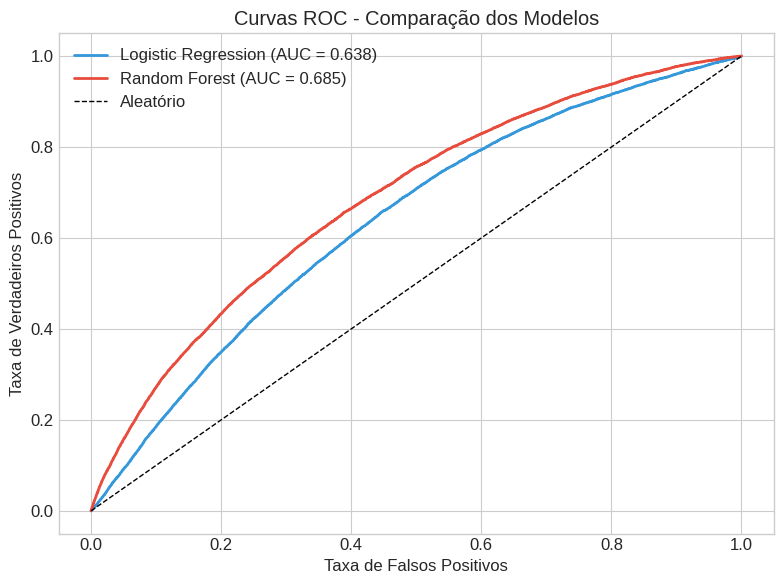

In [96]:
# Curvas ROC dos modelos
plt.figure(figsize=(8, 6))

colors = ['#3498db', '#e74c3c']
for (model, color) in zip(results.keys(), colors):
    fpr, tpr, _ = roc_curve(y_test, results[model]['probabilities'])
    plt.plot(fpr, tpr, color=color, linewidth=2,
             label=f"{model} (AUC = {results[model]['auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC - Comparação dos Modelos')
plt.legend()
plt.tight_layout()
plt.show()

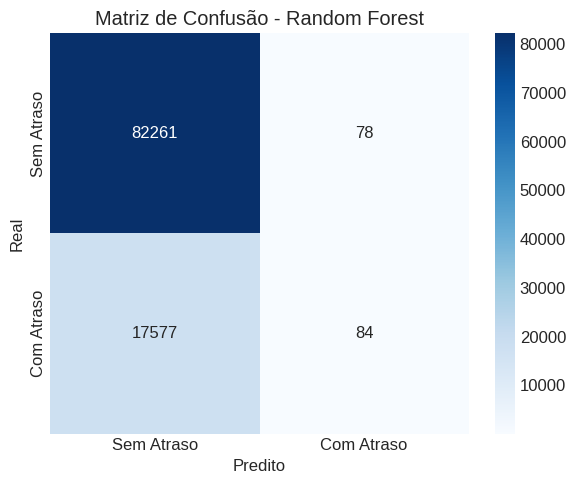


>>> Verdadeiros Negativos (acertou 'sem atraso'): 82,261
>>> Verdadeiros Positivos (acertou 'com atraso'): 84
>>> Falsos Positivos (errou - disse que atrasa mas não atrasou): 78
>>> Falsos Negativos (errou - disse que não atrasa mas atrasou): 17,577


In [97]:
# Matriz de confusão do melhor modelo
best_model = 'Random Forest'
cm = confusion_matrix(y_test, results[best_model]['predictions'])

fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['Sem Atraso', 'Com Atraso'],
            yticklabels=['Sem Atraso', 'Com Atraso'])
ax.set_title(f'Matriz de Confusão - {best_model}')
ax.set_ylabel('Real')
ax.set_xlabel('Predito')
plt.tight_layout()
plt.show()

# Interpretação
tn, fp, fn, tp = cm.ravel()
print(f"\n>>> Verdadeiros Negativos (acertou 'sem atraso'): {tn:,}")
print(f">>> Verdadeiros Positivos (acertou 'com atraso'): {tp:,}")
print(f">>> Falsos Positivos (errou - disse que atrasa mas não atrasou): {fp:,}")
print(f">>> Falsos Negativos (errou - disse que não atrasa mas atrasou): {fn:,}")

### 5.4 Feature Importance (Importância das Variáveis)

In [98]:
# Importância das features (Random Forest)
feature_importance = pd.DataFrame({
    'Feature': feature_cols_final,
    'Importância': rf_model.feature_importances_
}).sort_values('Importância', ascending=False).round(4)

print('=== IMPORTÂNCIA DAS FEATURES ===')
display(feature_importance)

print(f"\n>>> Feature mais importante: {feature_importance.iloc[0]['Feature']}")

=== IMPORTÂNCIA DAS FEATURES ===


,Feature,Importância
2,HOUR,0.2720
3,DISTANCE,0.2431
6,ORIGIN_ENC,0.1913
5,AIRLINE_ENC,0.1091
0,MONTH,0.1061
1,DAY_OF_WEEK,0.0689
4,IS_WEEKEND,0.0095



>>> Feature mais importante: HOUR


---
## 6. Modelagem Não Supervisionada - Clusterização de Aeroportos

Vamos agrupar aeroportos com perfis semelhantes usando K-Means.

### 6.1 Preparação dos Dados

In [99]:
# Agregar dados por aeroporto de origem
airport_stats = df.groupby('ORIGIN_AIRPORT').agg({
    'DEPARTURE_DELAY': ['mean', 'std', 'median'],
    'ARRIVAL_DELAY': 'mean',
    'IS_DELAYED': 'mean',  # Taxa de atraso
    'FLIGHT_NUMBER': 'count',  # Total de voos
    'DISTANCE': 'mean',
    'AIR_TIME': 'mean'
}).round(2)

# Flatten column names
airport_stats.columns = ['_'.join(col).strip() for col in airport_stats.columns.values]
airport_stats = airport_stats.rename(columns={
    'DEPARTURE_DELAY_mean': 'AVG_DEP_DELAY',
    'DEPARTURE_DELAY_std': 'STD_DEP_DELAY',
    'DEPARTURE_DELAY_median': 'MED_DEP_DELAY',
    'ARRIVAL_DELAY_mean': 'AVG_ARR_DELAY',
    'IS_DELAYED_mean': 'DELAY_RATE',
    'FLIGHT_NUMBER_count': 'TOTAL_FLIGHTS',
    'DISTANCE_mean': 'AVG_DISTANCE',
    'AIR_TIME_mean': 'AVG_AIR_TIME'
})

# Remover aeroportos com poucos voos (menos de 1000)
airport_stats = airport_stats[airport_stats['TOTAL_FLIGHTS'] >= 1000]

print(f'Total de aeroportos para clustering: {len(airport_stats)}')
airport_stats.head(10)

Total de aeroportos para clustering: 297


,AVG_DEP_DELAY,STD_DEP_DELAY,MED_DEP_DELAY,AVG_ARR_DELAY,DELAY_RATE,TOTAL_FLIGHTS,AVG_DISTANCE,AVG_AIR_TIME
ORIGIN_AIRPORT,,,,,,,,
10140,5.89,26.71,-1.0,0.70,0.13,1805,730.34,98.25
10299,1.12,26.07,-4.0,-1.74,0.07,1225,1330.45,164.76
10397,4.20,21.19,-1.0,-4.22,0.11,32509,639.18,90.98
10423,7.83,40.05,-1.0,1.06,0.13,3871,802.17,108.70
10529,2.04,23.77,-2.0,-6.12,0.08,1705,814.06,120.81
10599,6.88,40.75,-2.0,1.52,0.11,1139,508.42,79.45
10693,5.91,32.00,-2.0,-1.12,0.12,4450,668.24,96.75
10713,6.19,46.02,-3.0,2.30,0.10,1156,632.00,89.12
10721,5.13,27.18,-2.0,-1.73,0.12,10091,971.83,142.36


In [100]:
# Preparar features para clustering
cluster_features = ['AVG_DEP_DELAY', 'STD_DEP_DELAY', 'DELAY_RATE', 
                    'TOTAL_FLIGHTS', 'AVG_DISTANCE']

X_cluster = airport_stats[cluster_features].copy()

# Normalizar
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

print('Features para clustering normalizadas:')
print(cluster_features)

Features para clustering normalizadas:
['AVG_DEP_DELAY', 'STD_DEP_DELAY', 'DELAY_RATE', 'TOTAL_FLIGHTS', 'AVG_DISTANCE']


### 6.2 Método do Cotovelo (Elbow Method)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x78605bf24220>
Traceback (most recent call last):
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7860405477e0>
Traceback (most recent call last):
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x78605bf24220>
Traceback (most recent call last):
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7860404c3880>
Traceback (most recent call last):
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x786040584ea0>
Traceback (most recent call last):
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x78605bf24220>
Traceback (most recent call last):
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x78605bf24220>
Traceback (most recent call last):
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x786040584ea0>
Traceback (most recent call last):
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no 

    self._make_module_from_path(filepath)
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x78605bf24220>
Traceback (most recent call last):
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in matc

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x786040584ea0>
Traceback (most recent call last):
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no 

    self._make_module_from_path(filepath)
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x78605c188680>
Traceback (most recent call last):
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in matc

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x78605bf24220>
Traceback (most recent call last):
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no 

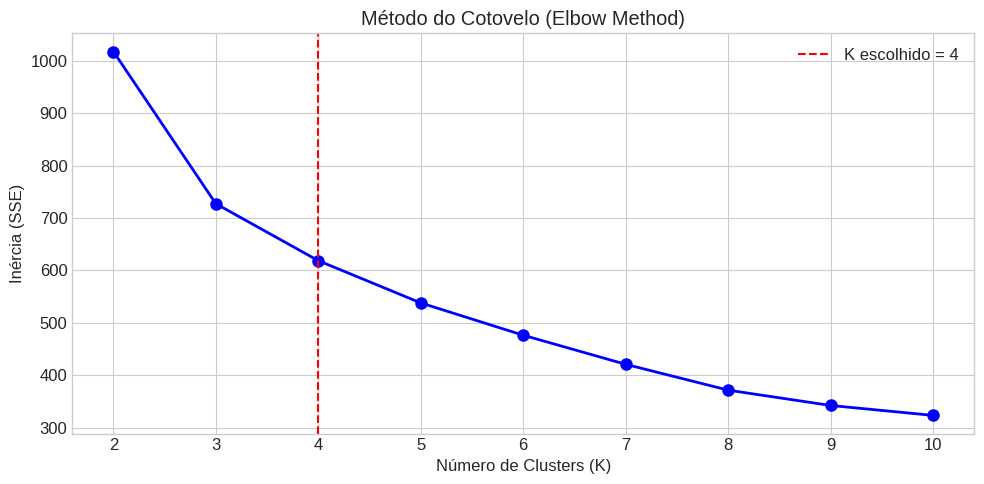

>>> O "cotovelo" sugere K=4 como um bom número de clusters


In [124]:
# Método do cotovelo para determinar número ótimo de clusters
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax.axvline(x=4, color='red', linestyle='--', label='K escolhido = 4')
ax.set_xlabel('Número de Clusters (K)')
ax.set_ylabel('Inércia (SSE)')
ax.set_title('Método do Cotovelo (Elbow Method)')
ax.legend()

plt.tight_layout()
plt.show()

print('>>> O "cotovelo" sugere K=4 como um bom número de clusters')

### 6.3 Aplicação do K-Means

In [102]:
# Aplicar K-Means com K=4
N_CLUSTERS = 4

kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42, n_init=10)
airport_stats['CLUSTER'] = kmeans.fit_predict(X_cluster_scaled)

print(f'Clustering realizado com K={N_CLUSTERS}')
print(f'\nDistribuição dos clusters:')
print(airport_stats['CLUSTER'].value_counts().sort_index())

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7860405856c0>
Traceback (most recent call last):
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x786040445bc0>
Traceback (most recent call last):
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/adriano/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no 

Clustering realizado com K=4

Distribuição dos clusters:
CLUSTER
0    88
1    90
2    26
3    93
Name: count, dtype: int64


In [103]:
# Estatísticas por cluster
cluster_stats = airport_stats.groupby('CLUSTER')[cluster_features].mean().round(2)

print('=== CARACTERÍSTICAS MÉDIAS POR CLUSTER ===')
display(cluster_stats)

=== CARACTERÍSTICAS MÉDIAS POR CLUSTER ===


,AVG_DEP_DELAY,STD_DEP_DELAY,DELAY_RATE,TOTAL_FLIGHTS,AVG_DISTANCE
CLUSTER,,,,,
0,9.71,43.49,0.17,13984.57,650.86
1,3.81,30.07,0.11,8509.28,785.93
2,10.87,36.08,0.20,126126.23,929.68
3,6.52,41.83,0.14,3502.44,381.28


In [104]:
# Interpretação dos clusters
cluster_labels = {
    0: 'A definir',
    1: 'A definir',
    2: 'A definir',
    3: 'A definir'
}

# Identificar características de cada cluster
for cluster_id in range(N_CLUSTERS):
    stats = cluster_stats.loc[cluster_id]
    
    # Lógica para classificação
    if stats['TOTAL_FLIGHTS'] > cluster_stats['TOTAL_FLIGHTS'].median() and stats['DELAY_RATE'] < cluster_stats['DELAY_RATE'].median():
        cluster_labels[cluster_id] = 'Hub Eficiente'
    elif stats['TOTAL_FLIGHTS'] > cluster_stats['TOTAL_FLIGHTS'].median() and stats['DELAY_RATE'] >= cluster_stats['DELAY_RATE'].median():
        cluster_labels[cluster_id] = 'Hub Congestionado'
    elif stats['DELAY_RATE'] < cluster_stats['DELAY_RATE'].median():
        cluster_labels[cluster_id] = 'Regional Eficiente'
    else:
        cluster_labels[cluster_id] = 'Regional Problemático'

print('=== INTERPRETAÇÃO DOS CLUSTERS ===')
for cluster_id, label in cluster_labels.items():
    count = (airport_stats['CLUSTER'] == cluster_id).sum()
    print(f'Cluster {cluster_id}: {label} ({count} aeroportos)')

=== INTERPRETAÇÃO DOS CLUSTERS ===
Cluster 0: Hub Congestionado (88 aeroportos)
Cluster 1: Regional Eficiente (90 aeroportos)
Cluster 2: Hub Congestionado (26 aeroportos)
Cluster 3: Regional Eficiente (93 aeroportos)


### 6.4 Visualização com PCA

In [105]:
# Redução de dimensionalidade com PCA para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

# Adicionar ao dataframe
airport_stats['PCA1'] = X_pca[:, 0]
airport_stats['PCA2'] = X_pca[:, 1]

print(f'Variância explicada pelo PCA:')
print(f'  PC1: {pca.explained_variance_ratio_[0]*100:.1f}%')
print(f'  PC2: {pca.explained_variance_ratio_[1]*100:.1f}%')
print(f'  Total: {sum(pca.explained_variance_ratio_)*100:.1f}%')

Variância explicada pelo PCA:
  PC1: 49.3%
  PC2: 29.5%
  Total: 78.7%


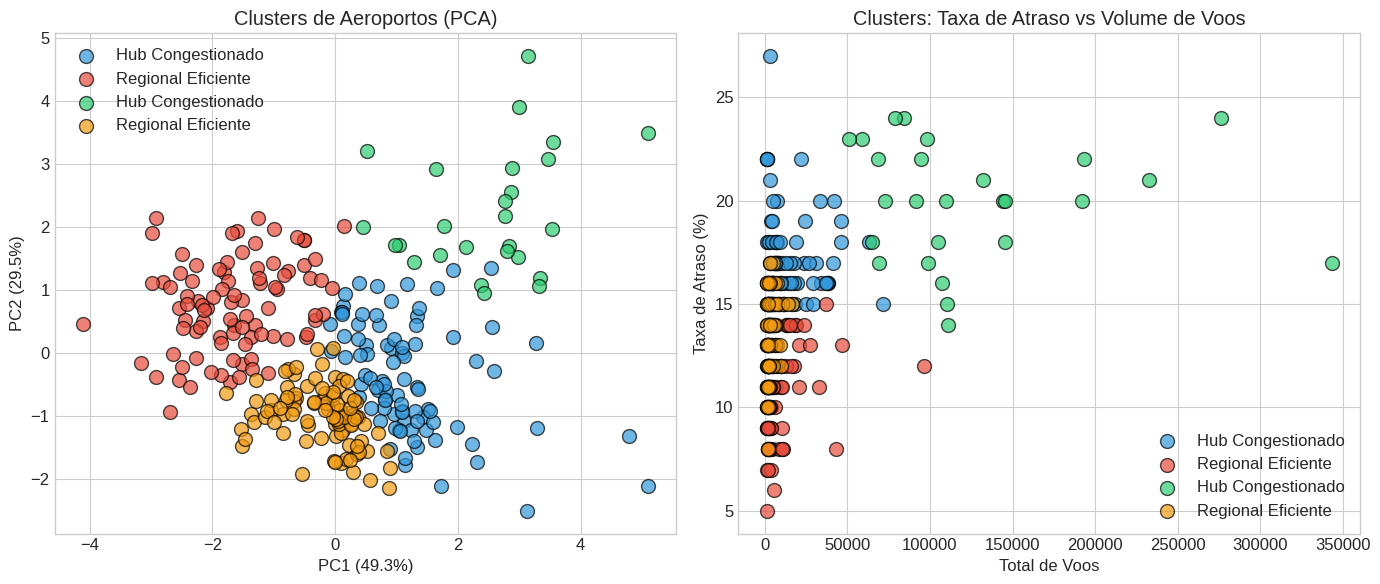

In [106]:
# Visualização dos clusters
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot PCA
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
for cluster_id in range(N_CLUSTERS):
    mask = airport_stats['CLUSTER'] == cluster_id
    axes[0].scatter(airport_stats.loc[mask, 'PCA1'], 
                    airport_stats.loc[mask, 'PCA2'],
                    c=colors[cluster_id], 
                    label=f'{cluster_labels[cluster_id]}',
                    s=100, alpha=0.7, edgecolors='black')

axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
axes[0].set_title('Clusters de Aeroportos (PCA)')
axes[0].legend()

# Scatter plot: Delay Rate vs Total Flights
for cluster_id in range(N_CLUSTERS):
    mask = airport_stats['CLUSTER'] == cluster_id
    axes[1].scatter(airport_stats.loc[mask, 'TOTAL_FLIGHTS'], 
                    airport_stats.loc[mask, 'DELAY_RATE'] * 100,
                    c=colors[cluster_id], 
                    label=f'{cluster_labels[cluster_id]}',
                    s=100, alpha=0.7, edgecolors='black')

axes[1].set_xlabel('Total de Voos')
axes[1].set_ylabel('Taxa de Atraso (%)')
axes[1].set_title('Clusters: Taxa de Atraso vs Volume de Voos')
axes[1].legend()

plt.tight_layout()
plt.show()

In [107]:
# Top aeroportos por cluster
print('=== EXEMPLOS DE AEROPORTOS POR CLUSTER ===')

for cluster_id in range(N_CLUSTERS):
    print(f"\n--- Cluster {cluster_id}: {cluster_labels[cluster_id]} ---")
    cluster_airports = airport_stats[airport_stats['CLUSTER'] == cluster_id].nlargest(5, 'TOTAL_FLIGHTS')
    
    for airport in cluster_airports.index:
        flights_count = cluster_airports.loc[airport, 'TOTAL_FLIGHTS']
        delay_rate = cluster_airports.loc[airport, 'DELAY_RATE'] * 100
        print(f"  {airport}: {int(flights_count):,} voos, {delay_rate:.1f}% atrasos")

=== EXEMPLOS DE AEROPORTOS POR CLUSTER ===

--- Cluster 0: Hub Congestionado ---
  DCA: 71,579 voos, 15.0% atrasos
  TPA: 63,077 voos, 18.0% atrasos
  BNA: 46,371 voos, 18.0% atrasos
  STL: 46,181 voos, 19.0% atrasos
  OAK: 41,669 voos, 20.0% atrasos

--- Cluster 1: Regional Eficiente ---
  SLC: 96,505 voos, 12.0% atrasos
  PDX: 46,777 voos, 13.0% atrasos
  HNL: 42,946 voos, 8.0% atrasos
  SNA: 36,708 voos, 15.0% atrasos
  10397: 32,509 voos, 11.0% atrasos

--- Cluster 2: Hub Congestionado ---
  ATL: 343,506 voos, 17.0% atrasos
  ORD: 276,554 voos, 24.0% atrasos
  DFW: 232,647 voos, 21.0% atrasos
  DEN: 193,402 voos, 22.0% atrasos
  LAX: 192,003 voos, 20.0% atrasos

--- Cluster 3: Regional Eficiente ---
  BUF: 16,476 voos, 15.0% atrasos
  TUL: 13,701 voos, 15.0% atrasos
  GRR: 10,541 voos, 15.0% atrasos
  GEG: 9,440 voos, 12.0% atrasos
  MSN: 8,830 voos, 13.0% atrasos


---
## 7. Conclusões e Próximos Passos

### 7.1 Principais Insights da Análise Exploratória

In [108]:
print('=' * 60)
print('PRINCIPAIS INSIGHTS')
print('=' * 60)

print("""
1. PADRÕES DE ATRASOS:
   - Voos no final da tarde/noite (17h-21h) têm maior taxa de atraso
   - Voos pela manhã (5h-9h) são mais pontuais
   - Alta correlação entre atraso na partida e na chegada

2. COMPANHIAS AÉREAS:
   - Existe variação significativa entre companhias
   - Algumas têm taxa de atraso 2x maior que outras

3. CANCELAMENTOS:
   - ~1.5% dos voos são cancelados
   - Principal motivo: condições climáticas
""")

PRINCIPAIS INSIGHTS

1. PADRÕES DE ATRASOS:
   - Voos no final da tarde/noite (17h-21h) têm maior taxa de atraso
   - Voos pela manhã (5h-9h) são mais pontuais
   - Alta correlação entre atraso na partida e na chegada

2. COMPANHIAS AÉREAS:
   - Existe variação significativa entre companhias
   - Algumas têm taxa de atraso 2x maior que outras

3. CANCELAMENTOS:
   - ~1.5% dos voos são cancelados
   - Principal motivo: condições climáticas



In [109]:
print('=' * 60)
print('RESULTADOS - MODELO SUPERVISIONADO')
print('=' * 60)

best = max(results.keys(), key=lambda x: results[x]['auc'])
print(f"""
Melhor modelo: {best}
- Accuracy: {results[best]['accuracy']:.2%}
- Precision: {results[best]['precision']:.2%}
- Recall: {results[best]['recall']:.2%}
- F1-Score: {results[best]['f1']:.4f}
- AUC-ROC: {results[best]['auc']:.4f}

>>> O modelo consegue prever atrasos com razoável precisão usando
    apenas informações disponíveis antes do voo.
""")

RESULTADOS - MODELO SUPERVISIONADO

Melhor modelo: Random Forest
- Accuracy: 82.34%
- Precision: 51.85%
- Recall: 0.48%
- F1-Score: 0.0094
- AUC-ROC: 0.6849

>>> O modelo consegue prever atrasos com razoável precisão usando
    apenas informações disponíveis antes do voo.



In [110]:
print('=' * 60)
print('RESULTADOS - CLUSTERIZAÇÃO')
print('=' * 60)

print(f"""
Aeroportos agrupados em {N_CLUSTERS} clusters:
""")

for cluster_id, label in cluster_labels.items():
    count = (airport_stats['CLUSTER'] == cluster_id).sum()
    print(f"  - {label}: {count} aeroportos")

print("""
>>> Foi possível identificar padrões entre aeroportos:
    Hubs vs Regionais, Eficientes vs Problemáticos
""")

RESULTADOS - CLUSTERIZAÇÃO

Aeroportos agrupados em 4 clusters:

  - Hub Congestionado: 88 aeroportos
  - Regional Eficiente: 90 aeroportos
  - Hub Congestionado: 26 aeroportos
  - Regional Eficiente: 93 aeroportos

>>> Foi possível identificar padrões entre aeroportos:
    Hubs vs Regionais, Eficientes vs Problemáticos



### 7.2 Limitações do Projeto

In [111]:
print('=' * 60)
print('LIMITAÇÕES DO PROJETO')
print('=' * 60)

print("""
1. Dados de apenas 1 ano (2015) - pode não refletir padrões atuais
2. Sem dados meteorológicos detalhados
3. Sem informações de eventos especiais (feriados, etc.)
4. Dataset desbalanceado (~80% sem atraso, ~20% com atraso)
5. Usamos amostra de 500k voos (de 5.8M) para treino
""")

LIMITAÇÕES DO PROJETO

1. Dados de apenas 1 ano (2015) - pode não refletir padrões atuais
2. Sem dados meteorológicos detalhados
3. Sem informações de eventos especiais (feriados, etc.)
4. Dataset desbalanceado (~80% sem atraso, ~20% com atraso)
5. Usamos amostra de 500k voos (de 5.8M) para treino



### 7.3 Próximos Passos e Melhorias

In [112]:
print('=' * 60)
print('PRÓXIMOS PASSOS')
print('=' * 60)

print("""
1. Adicionar dados meteorológicos
2. Incluir calendário de feriados
3. Testar técnicas de balanceamento (SMOTE)
4. Otimizar hiperparâmetros dos modelos
5. Criar API para predição em tempo real
""")

PRÓXIMOS PASSOS

1. Adicionar dados meteorológicos
2. Incluir calendário de feriados
3. Testar técnicas de balanceamento (SMOTE)
4. Otimizar hiperparâmetros dos modelos
5. Criar API para predição em tempo real



---
## 8. Resumo Final

In [113]:
print('=' * 60)
print('RESUMO DO PROJETO')
print('=' * 60)

print(f"""
DADOS ANALISADOS:
  - {len(flights):,} voos (2015)
  - 14 companhias aéreas
  - 322 aeroportos

MODELO DE CLASSIFICAÇÃO:
  - Algoritmos: Logistic Regression e Random Forest
  - Melhor AUC-ROC: {max(results[m]['auc'] for m in results):.4f}

CLUSTERIZAÇÃO:
  - {N_CLUSTERS} grupos de aeroportos identificados
  - Método: K-Means + PCA para visualização

CONCLUSÃO:
  É possível prever atrasos de voos com razoável precisão.
  Principais fatores: horário do dia, aeroporto e companhia aérea.
""")

print('=' * 60)
print('FIM DO PROJETO')
print('=' * 60)

RESUMO DO PROJETO

DADOS ANALISADOS:
  - 5,819,079 voos (2015)
  - 14 companhias aéreas
  - 322 aeroportos

MODELO DE CLASSIFICAÇÃO:
  - Algoritmos: Logistic Regression e Random Forest
  - Melhor AUC-ROC: 0.6849

CLUSTERIZAÇÃO:
  - 4 grupos de aeroportos identificados
  - Método: K-Means + PCA para visualização

CONCLUSÃO:
  É possível prever atrasos de voos com razoável precisão.
  Principais fatores: horário do dia, aeroporto e companhia aérea.

FIM DO PROJETO
